# TESTS DE COMPROBACIÓN

- nº de trayectorias en cada frame vs frame
- función suavizado para localizar puntos (savgol, polinomio orden 3)
- (v_media)²/<v²> <<< 1
- f(v_x) vs v_x // f(v_y) vs v_y 


                  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
from pandas import DataFrame, Series  
import trackpy as tp
from scipy.signal import savgol_filter
import math

#interactive graphics
%matplotlib widget 

from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image

L= 800 # system size (pixels)

In [2]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [6]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  2

/tmp/ipykernel_263177/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_263177/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  42724

In [7]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
#        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [3]:
def printp(string):
    """ Modification of print function to do everything on one line """
    import sys
    sys.stdout.write('\r'+ str(string))
    sys.stdout.flush()

In [67]:
#función para representar una trayectoria de un df
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track(df,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df, t_id).x.values, track(df,t_id).y.values, '.', c='b')
    print('run \'plot.close(t_id)\' when finished\n')

In [56]:
#función para representar la misma trayectoria (t_id) de dos df (sin filtrar y filtrado)
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track2(df1,df2,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df1, t_id).x.values, track(df1,t_id).y.values, '.', c='g',markersize=4)
    ax.plot(track(df2, t_id).x.values, track(df2,t_id).y.values, '.', c='r',markersize=2)

    print('run \'plot.close(t_id)\' when finished\n')

In [55]:
#función para representar la misma trayectoria (t_id) de dos df (sin filtrar y filtrado)
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track3(df1,df2,df3,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df1, t_id).x.values, track(df1,t_id).y.values, '.', c='g',markersize=5)
    ax.plot(track(df2, t_id).x.values, track(df2,t_id).y.values, '.', c='b',markersize=3)
    ax.plot(track(df3, t_id).x.values, track(df3,t_id).y.values, '.', c='r',markersize=1)

    print('run \'plot.close(t_id)\' when finished\n')

In [ ]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.35_f75Hz.pkl')

In [ ]:
nt = np.max(data.frame.values)

In [ ]:
ntrayec=np.zeros(nt)
for i in range(nt):
    ntrayec[i]=len(data[data.frame==i])

In [ ]:
ntrayec

In [ ]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.35_f75Hz.txt',ntrayec)

In [14]:
ntrayec0_35=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.35_f75Hz.txt')
ntrayec0_2=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.2_f75Hz.txt')
ntrayec0_1=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.1_f75Hz.txt')
ntrayec0_00625=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.00625_f75Hz.txt')

In [ ]:
np.max(ntrayec0_35), np.max(ntrayec0_2), np.max(ntrayec0_1), np.max(ntrayec0_00625)

In [ ]:
plt.close('all')

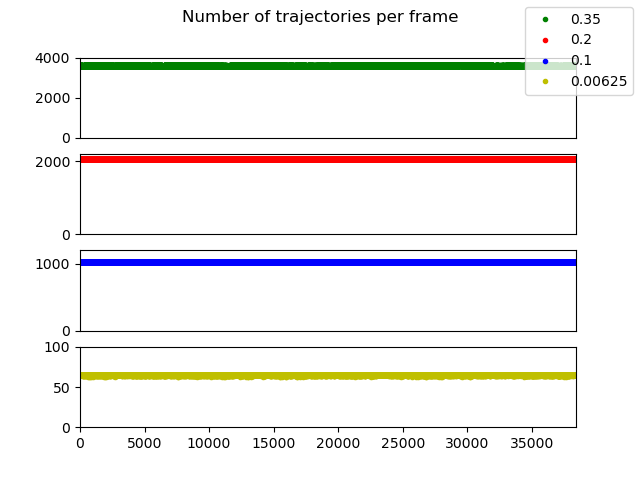

In [15]:
fig = plt.figure()
fig.suptitle('Number of trajectories per frame')
ax = fig.add_subplot(4,1,1)
ax.set_xlim(0,nt)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylim(0,4000)
ax.plot(ntrayec0_35,'.',c='g')
ay = fig.add_subplot(4,1,2)
ay.set_xlim(0,nt)
ay.axes.get_xaxis().set_visible(False)
ay.set_ylim(0,2200)
ay.plot(ntrayec0_2,'.',c='r')
aw = fig.add_subplot(4,1,3)
aw.set_xlim(0,nt)
aw.set_ylim(0,1200)
aw.plot(ntrayec0_1,'.',c='b')
aw.axes.get_xaxis().set_visible(False)
az = fig.add_subplot(4,1,4)
az.set_xlim(0,nt)
az.set_ylim(0,100)
az.plot(ntrayec0_00625,'.',c='y')
fig.legend(['0.35','0.2','0.1','0.00625'],loc='upper right')


# FUNCIÓN PARA SUAVIZAR DETECCIÓN PARTÍCULAS

### Densidad 0.00625

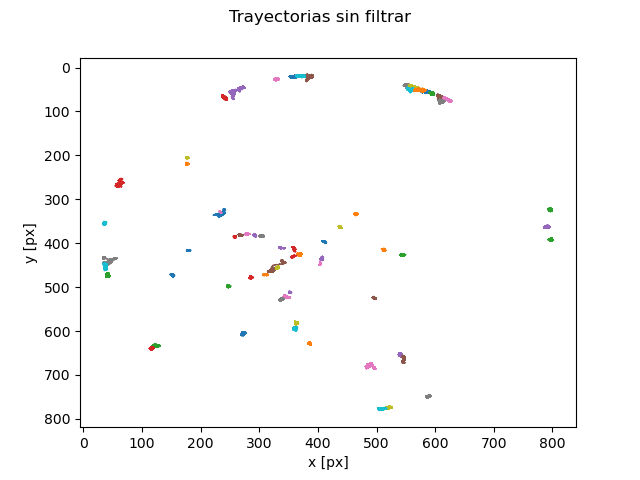

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [57]:
plt.figure()
plt.suptitle('Trayectorias sin filtrar')
tp.plot_traj(data)

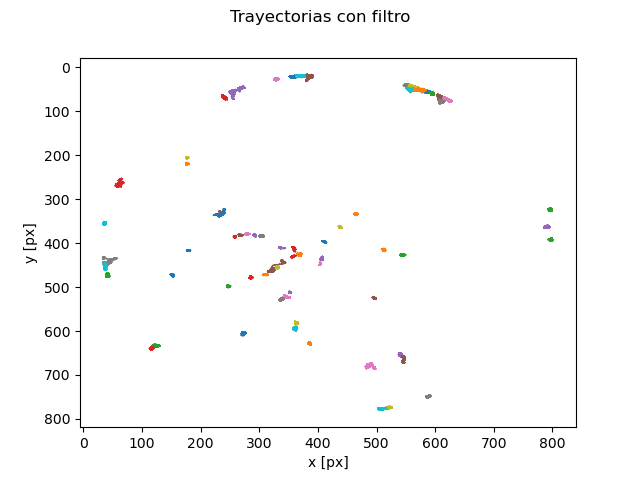

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [11]:
plt.figure()
plt.suptitle('Trayectorias con filtro')
tp.plot_traj(new_df)

In [64]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.00625_f75Hz.pkl')

In [65]:
dataveloc= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.00625_f75Hz.pkl')

### histograma // funcion de distribucion para vx y vy

In [71]:
hx00625filter, bordesx00625filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy00625filter, bordesy00625filter= np.histogram(datavelocfilter['vy'].values,bins=1000)
h00625filter, bordes00625filter= np.histogram(datavelocfilter['v'].values,bins=1000)

### Distribution function vx, vy filtering trayectories

In [8]:
plt.figure()
plt.plot(bordesx00625filter[:-1],hx00625filter)
plt.plot(bordesy00625filter[:-1],hy00625filter)


### Distribution function v filtering trayectories

In [6]:
h00625filter, bordes00625filter= np.histogram(datavelocfilter['v'].values,bins=1000)

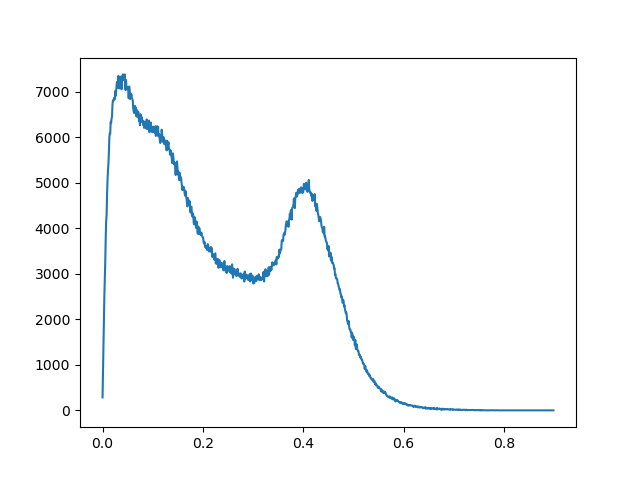

In [9]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)

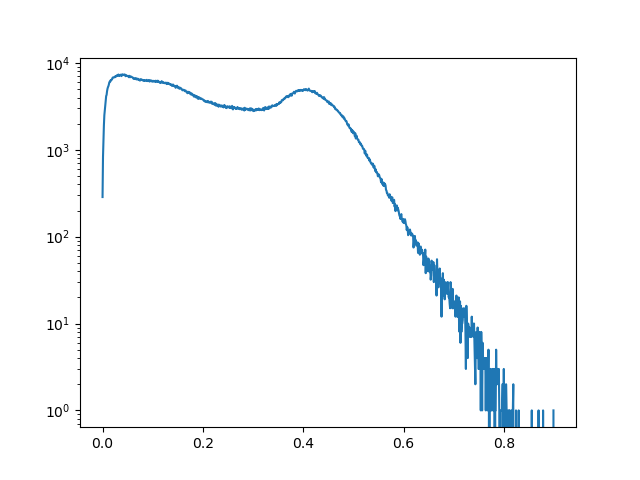

In [10]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)
plt.yscale('log')

In [72]:
hx00625, bordesx00625= np.histogram(dataveloc['vx'].values,bins=1000)
hy00625, bordesy00625= np.histogram(dataveloc['vy'].values,bins=1000)
h00625, bordes00625= np.histogram(dataveloc['v'].values,bins=1000)

### Distribution function vx, vy without filtering trayectories

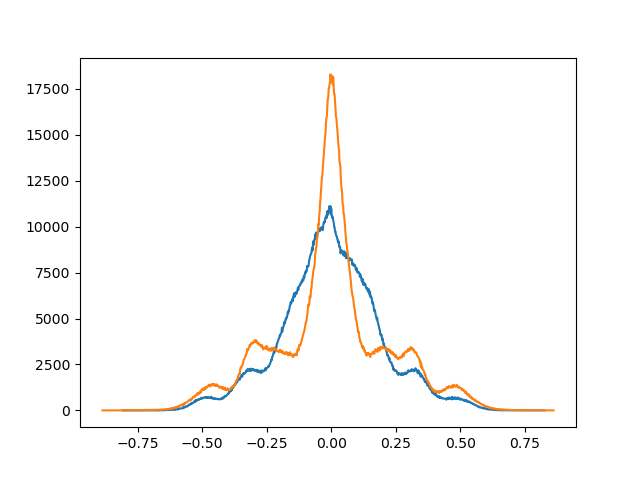

In [19]:
plt.figure()
plt.plot(bordesx00625[:-1],hx00625)
plt.plot(bordesy00625[:-1],hy00625)


### Distribution function v without filtering trayectories

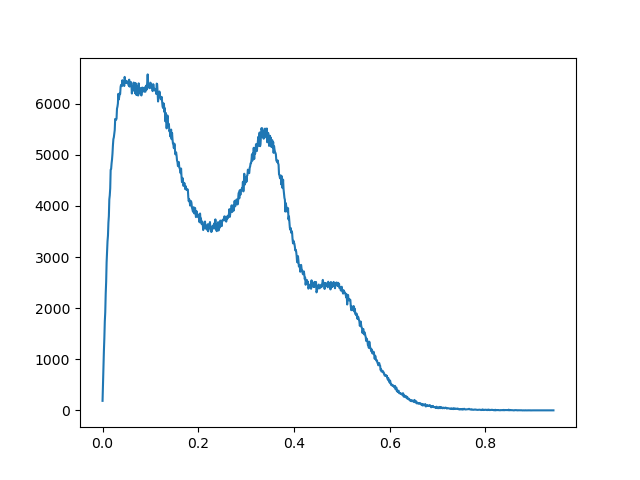

In [13]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)

### Distribution function v comparison filtering (blue) and without filtering (orange)

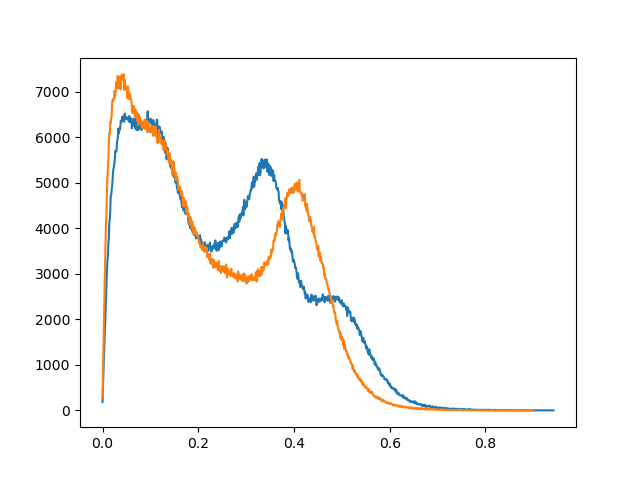

In [14]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes00625filter[:-1],h00625filter)


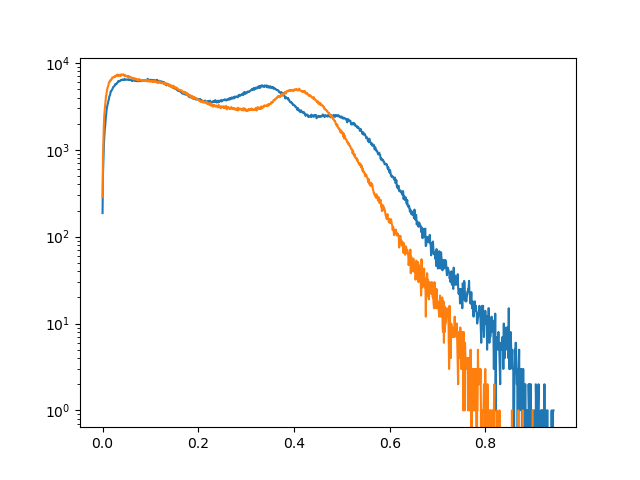

In [15]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes00625filter[:-1],h00625filter)
plt.yscale('log')


In [33]:
varv00625filter=datavelocfilter['v'].var(ddof=0)
varv00625=dataveloc['v'].var(ddof=0)

# TEST
# Plotting trayectories comparision filtering vs no filtering

run 'plot.close(t_id)' when finished



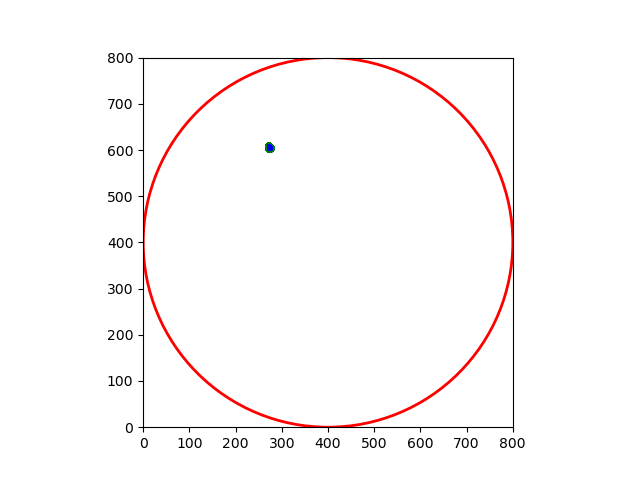

In [52]:
plot_track(new_df,data,20)

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/335166604.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df[new_df.frame<1100][new_df.frame>1000],data[data.frame<1100][data.frame>1000],1)


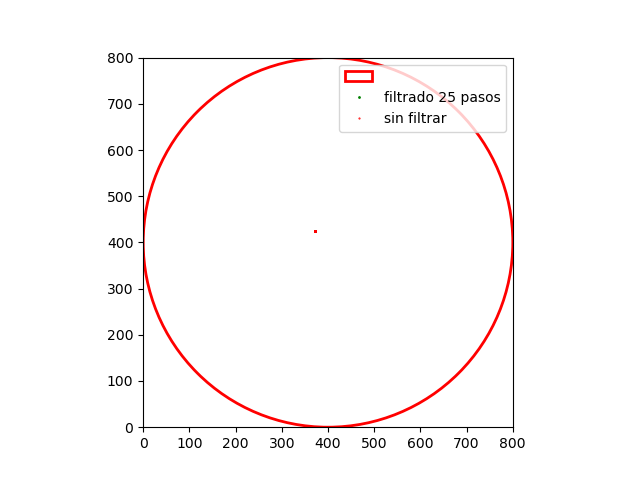

In [52]:
plt.close(1)
plot_track2(new_df[new_df.frame<1100][new_df.frame>1000],data[data.frame<1100][data.frame>1000],1)
plt.legend(['','filtrado 25 pasos','sin filtrar'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/2922102087.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],data[data.frame<1100][data.frame>1000],1)


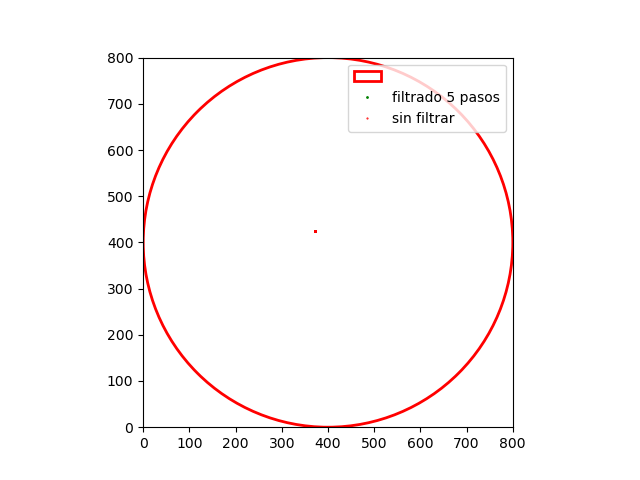

In [53]:
plt.close(1)
plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],data[data.frame<1100][data.frame>1000],1)
plt.legend(['','filtrado 5 pasos','sin filtrar'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/666355509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)


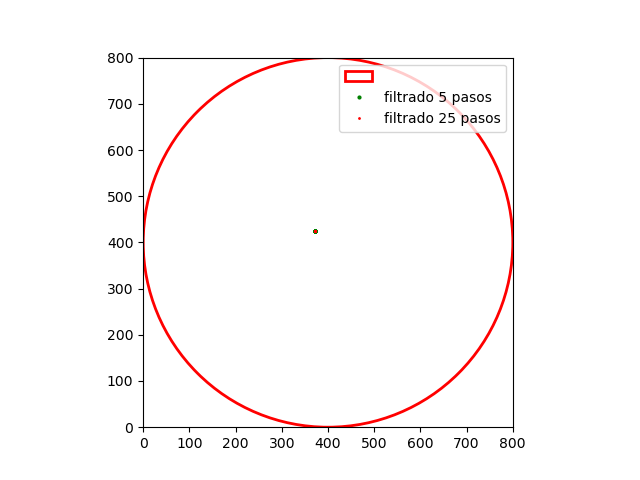

In [58]:
plt.close(1)
plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)
plt.legend(['','filtrado 5 pasos','filtrado 25 pasos'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/2285462388.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track3(data[data.frame<1100][data.frame>1000],new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)


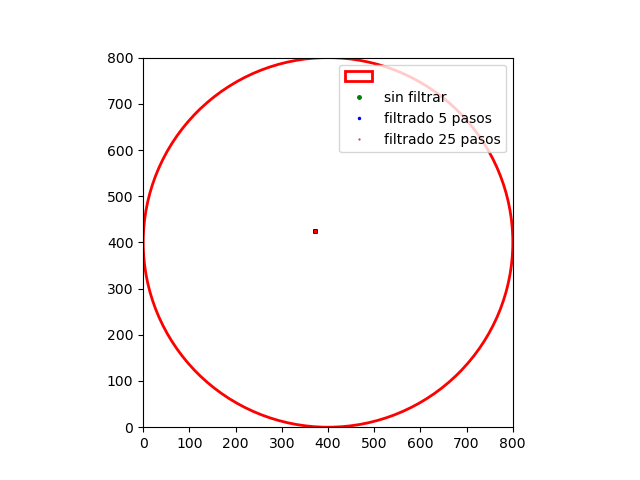

In [57]:
plt.close(1)
plot_track3(data[data.frame<1100][data.frame>1000],new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)
plt.legend(['','sin filtrar','filtrado 5 pasos','filtrado 25 pasos'],loc='upper right')

# TEST
## x position vs time comparision filtering vs no filtering

In [89]:
posxfilter=new_df[new_df.track==10].x.values
posx=data[data.track==10].x.values

In [88]:
t=data[data.track==10].frame.values
tfilter=new_df[new_df.track==10].frame.values

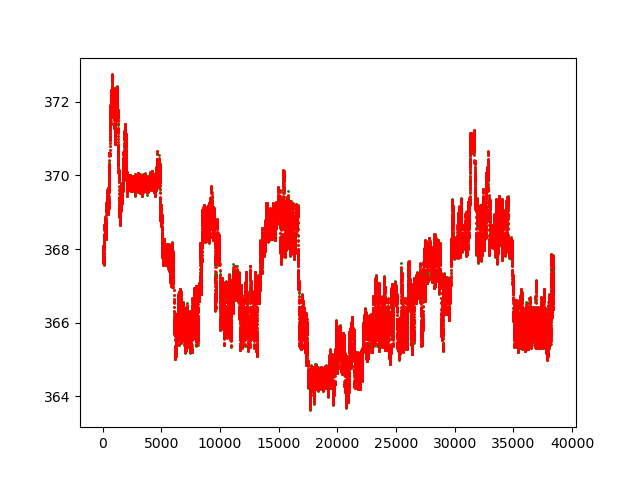

In [87]:
plt.figure()
plt.scatter(t,posx,s=1,c='g')
plt.scatter(t,posxfilter,s=1,c='r')

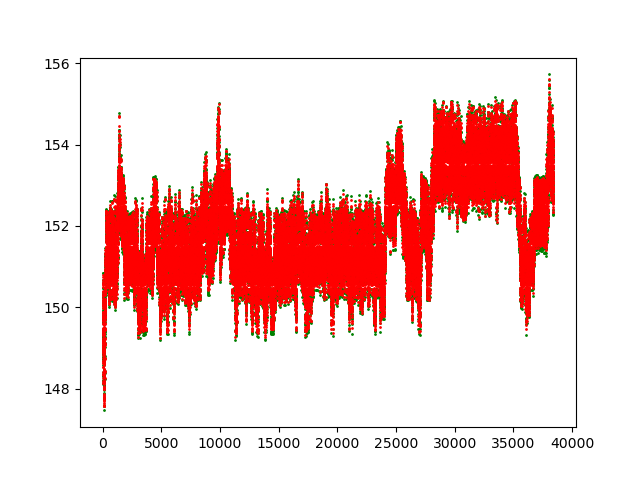

In [90]:
plt.figure()
plt.scatter(t,posx,s=1,c='g')
plt.scatter(tfilter,posxfilter,s=1,c='r')

In [74]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625filter.txt',bordes00625filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625filter.txt',h00625filter)

In [73]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625.txt',bordes00625)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625.txt',h00625)

## Densidad 0.1

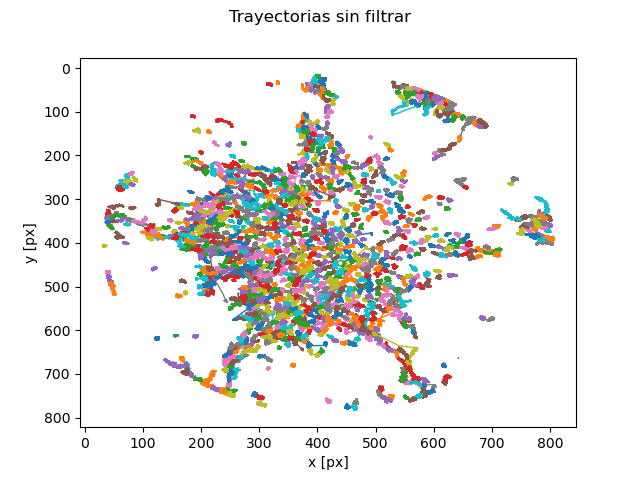

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [94]:
plt.figure()
plt.suptitle('Trayectorias sin filtrar')
tp.plot_traj(data)

In [98]:
plt.figure()
plt.suptitle('Trayectorias con filtro')
tp.plot_traj(new_df)

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [19]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.1_f75Hz.pkl')

In [10]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.1_f75Hz.pkl')


### histograma // funcion de distribucion para vx y vy

In [11]:
hx01filter, bordesx01filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy01filter, bordesy01filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

### Distribution function vx, vy filtering trayectories

(-0.5, 0.5)

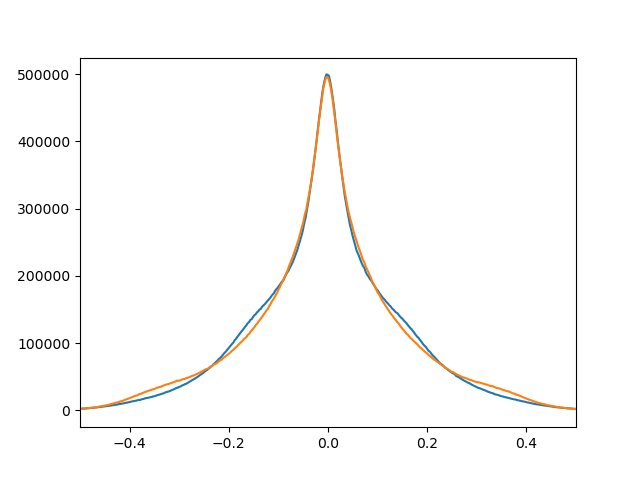

In [12]:
plt.figure()
plt.plot(bordesx01filter[:-1],hx01filter)
plt.plot(bordesy01filter[:-1],hy01filter)
plt.xlim(-0.5,0.5)
#plt.yscale('log')


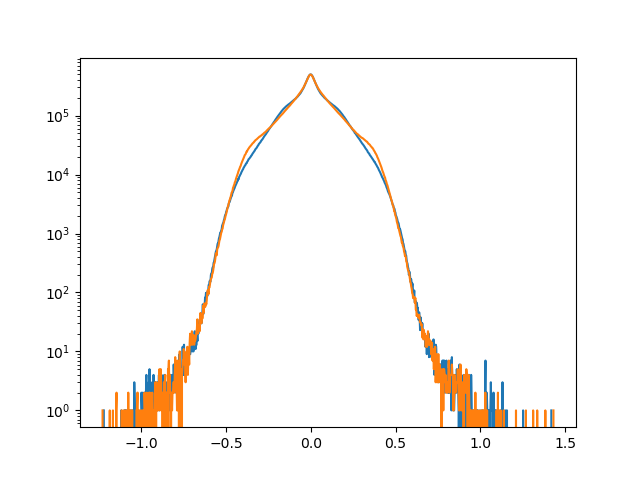

In [13]:
plt.figure()
plt.plot(bordesx01filter[:-1],hx01filter)
plt.plot(bordesy01filter[:-1],hy01filter)
#plt.xlim(-0.5,0.5)
plt.yscale('log')


### Distribution function v  filtering trayectories

In [14]:
h01filter, bordes01filter=np.histogram(datavelocfilter['v'].values,bins=1000)

(0.0, 0.6)

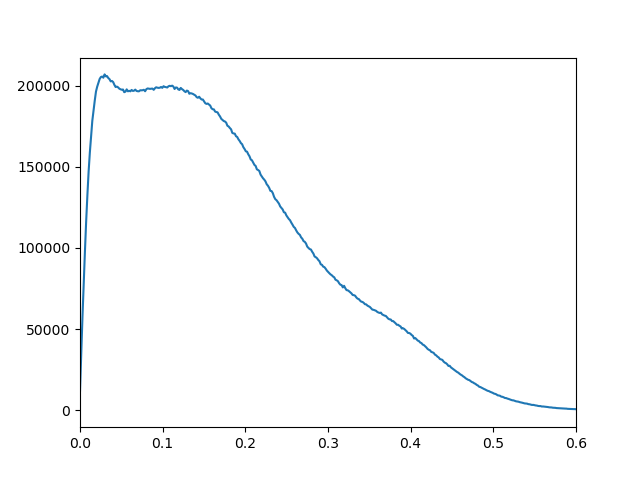

In [15]:
plt.figure()
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,0.6)

In [16]:
plt.figure()
plt.plot(bordes01filter[:-1],h01filter)
plt.yscale('log')
plt.xlim(0,1)

(0.0, 1.0)

### Distribution function vx, vy without filtering trayectories

In [21]:
hx01, bordesx01= np.histogram(dataveloc['vx'].values,bins=1000)
hy01, bordesy01= np.histogram(dataveloc['vy'].values,bins=1000)

(-0.5, 0.5)

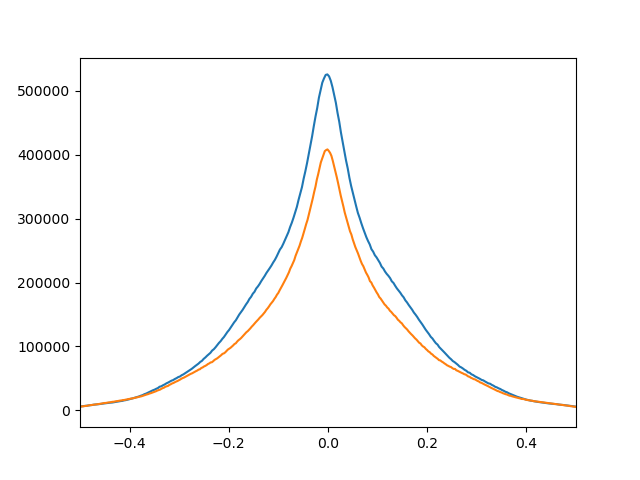

In [22]:
plt.figure()
plt.plot(bordesx01[:-1],hx01)
plt.plot(bordesy01[:-1],hy01)
plt.xlim(-0.5,0.5)


### Distribution function v without filtering trayectories

In [23]:
h01, bordes01=np.histogram(dataveloc['v'].values,bins=1000)

In [24]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.xlim(0,0.6)

(0.0, 0.6)

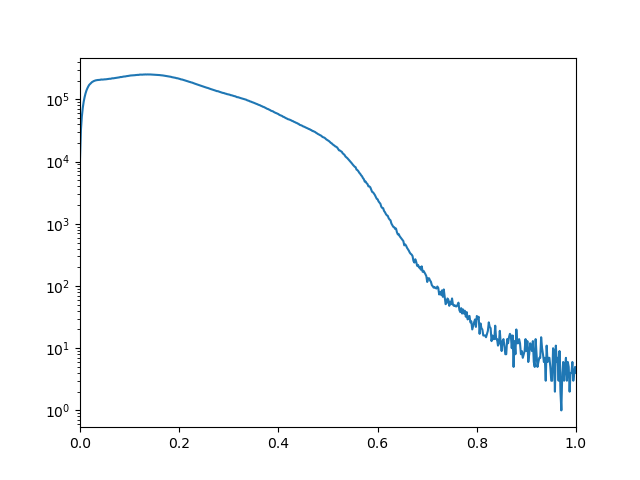

In [25]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.xlim(0,1)
plt.yscale('log')

### Distribution function v comparison filtering (blue) and without filtering (orange)

In [26]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,0.6)


(0.0, 0.6)

In [27]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,1)
plt.yscale('log')


In [17]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1filter.txt',bordes01filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1filter.txt',h01filter)

In [28]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1.txt',bordes01)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1.txt',h01)

## Densidad 0.2

In [31]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.2_f75Hz.pkl')

In [18]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.2_f75Hz.pkl')


### histograma // funcion de distribucion para vx y vy

In [21]:
hx02filter, bordesx02filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy02filter, bordesy02filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

### Distribution function vx, vy filtering trayectories

(-0.6, 0.6)

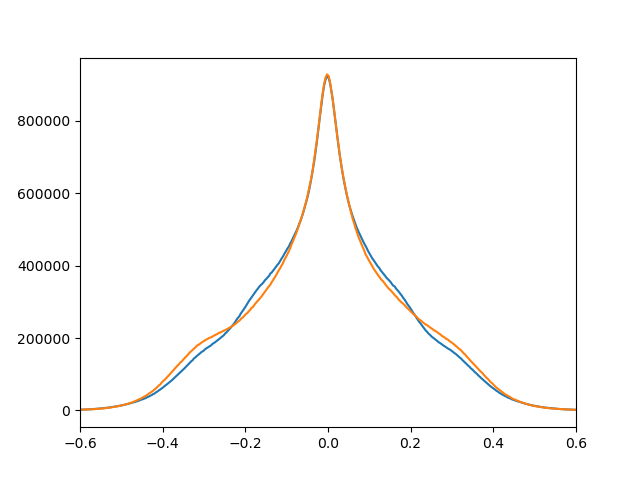

In [26]:
plt.figure()
plt.plot(bordesx02filter[:-1],hx02filter)
plt.plot(bordesy02filter[:-1],hy02filter)
plt.xlim(-0.6,0.6)


### Distribution function v  filtering trayectories

In [23]:
h02filter, bordes02filter=np.histogram(datavelocfilter['v'].values,bins=1000)

(0.0, 0.6)

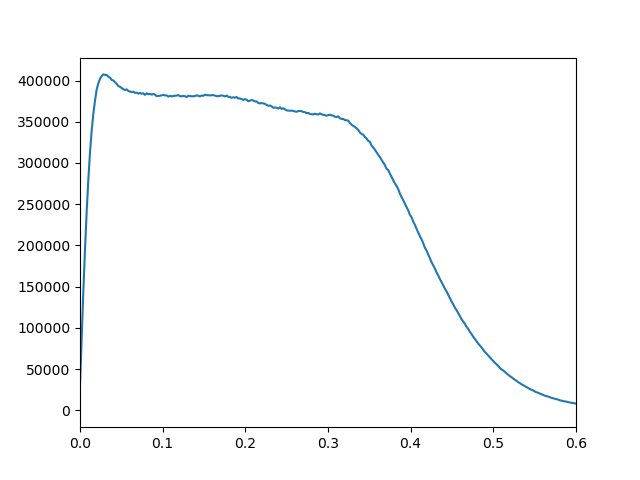

In [27]:
plt.figure()
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,0.6)

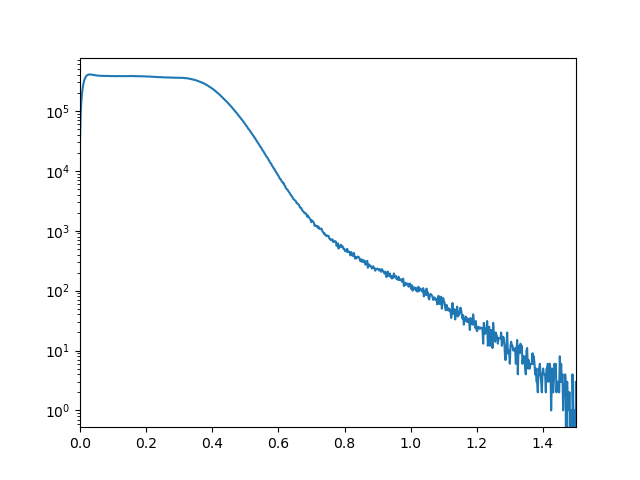

In [30]:
plt.figure()
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,1.5)
plt.yscale('log')

In [35]:
hx02, bordesx02= np.histogram(dataveloc['vx'].values,bins=1000)
hy02, bordesy02= np.histogram(dataveloc['vy'].values,bins=1000)

### Distribution function vx, vy without filtering trayectories

(-0.6, 0.6)

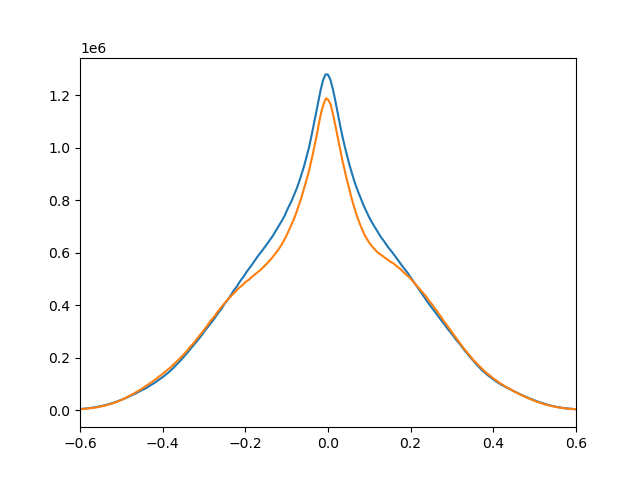

In [36]:
plt.figure()
plt.plot(bordesx02[:-1],hx02)
plt.plot(bordesy02[:-1],hy02)
plt.xlim(-0.6,0.6)


### Distribution function v without filtering trayectories

In [37]:
h02, bordes02=np.histogram(dataveloc['v'].values,bins=1000)

In [38]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.xlim(0,0.6)

(0.0, 0.6)

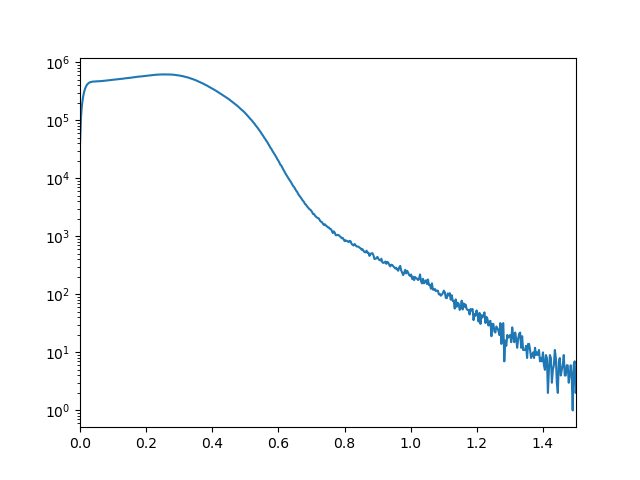

In [39]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.xlim(0,1.5)
plt.yscale('log')

### Distribution function v comparison filtering (blue) and without filtering (orange)

(0.0, 0.6)

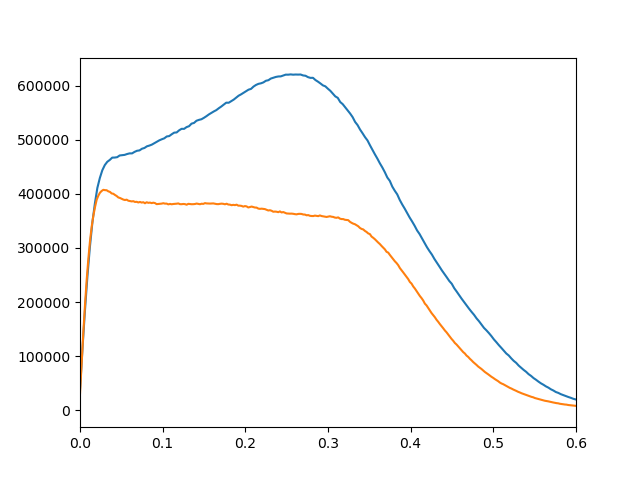

In [40]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,0.6)


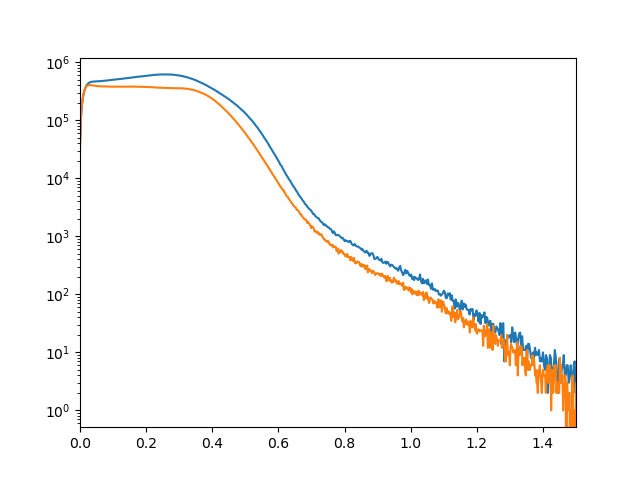

In [41]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,1.5)
plt.yscale('log')

In [25]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2filter.txt',bordes02filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2filter.txt',h02filter)

In [42]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2.txt',bordes02)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2.txt',h02)

## Densidad 0.3

In [4]:
datavelocfilter = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.3_f75Hz.pkl')


In [4]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.3_f75Hz.pkl')

In [5]:
dataveloc=dataveloc[dataveloc.frame>=0]

### histograma // funcion de distribucion para vx y vy

In [6]:
hx03filter, bordesx03filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy03filter, bordesy03filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

### Distribution function vx, vy filtering trayectories

In [7]:
plt.figure()
plt.plot(bordesx03filter[:-1],hx03filter)
plt.plot(bordesy03filter[:-1],hy03filter)


### Distribution function v  filtering trayectories

In [8]:
h03filter, bordes03filter=np.histogram(datavelocfilter['v'].values,bins=1000)

In [30]:
plt.figure()
plt.plot(bordes03filter[:-1],h03filter)
plt.xlim(0,0.6)

(0.0, 0.6)

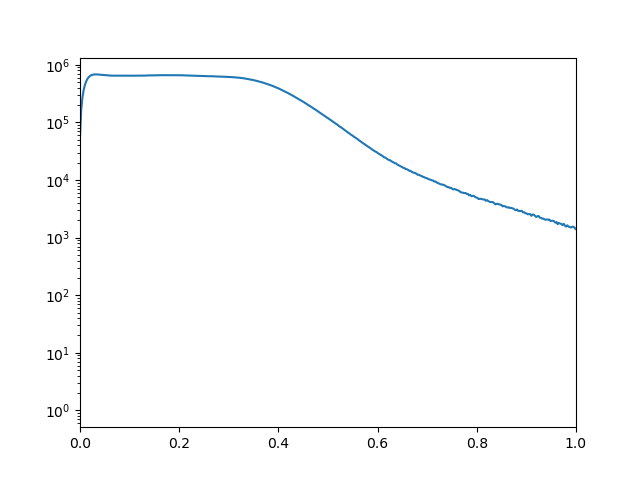

In [31]:
plt.figure()
plt.plot(bordes03filter[:-1],h03filter)
plt.xlim(0,1)
plt.yscale('log')

In [10]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.3filter.txt',bordes03filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.3filter.txt',h03filter)

In [6]:
hx03, bordesx03= np.histogram(dataveloc['vx'].values,bins=1000)
hy03, bordesy03= np.histogram(dataveloc['vy'].values,bins=1000)

### Distribution function vx, vy without filtering trayectories

(-0.4, 0.4)

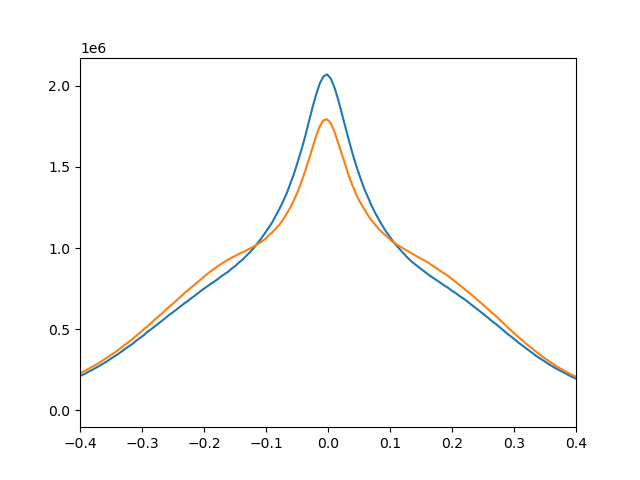

In [7]:
plt.figure()
plt.plot(bordesx03[:-1],hx03)
plt.plot(bordesy03[:-1],hy03)
plt.xlim(-0.4,0.4)


In [8]:
h03, bordes03=np.histogram(dataveloc['v'].values,bins=1000)

### Distribution function v without filtering trayectories

(0.0, 0.6)

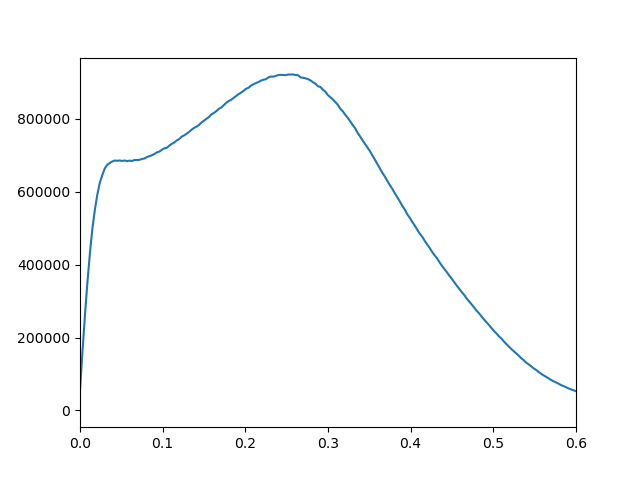

In [9]:
plt.figure()
plt.plot(bordes03[:-1],h03)
plt.xlim(0,0.6)

In [29]:
plt.figure()
plt.plot(bordes03[:-1],h03)
plt.xlim(0,1)
plt.yscale('log')

In [28]:
bordes03filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.3filter.txt')
h03filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.3filter.txt')

### Distribution function v comparison filtering (blue) and without filtering (orange)

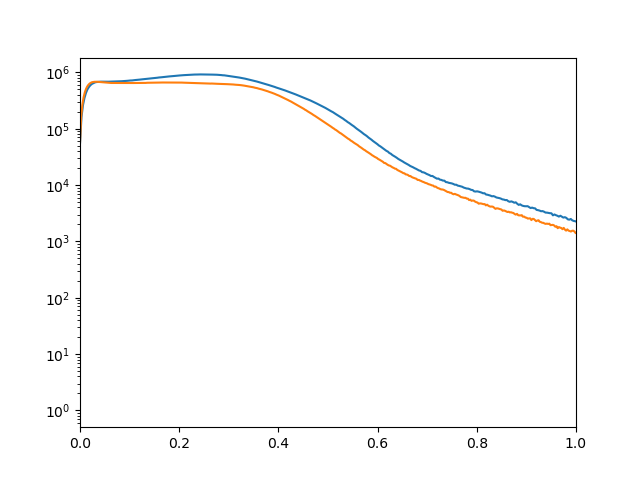

In [13]:
plt.figure()
plt.plot(bordes03[:-1],h03)
plt.plot(bordes03filter[:-1],h03filter)
plt.xlim(0,1)
plt.yscale('log')


In [14]:
plt.figure()
plt.plot(bordes03[:-1],h03)
plt.plot(bordes03filter[:-1],h03filter)
plt.xlim(0,1)
#plt.yscale('log')


(0.0, 1.0)

In [15]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.3.txt',bordes03)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.3.txt',h03)

## Densidad 0.4

In [22]:
datavelocfilter = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.4_f75Hz.pkl')


In [4]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.4_f75Hz.pkl')


In [5]:
dataveloc=dataveloc[dataveloc.frame>=0]

### histograma // funcion de distribucion para vx y vy

In [5]:
hx04filter, bordesx04filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy04filter, bordesy04filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

### Distribution function vx, vy filtering trayectories

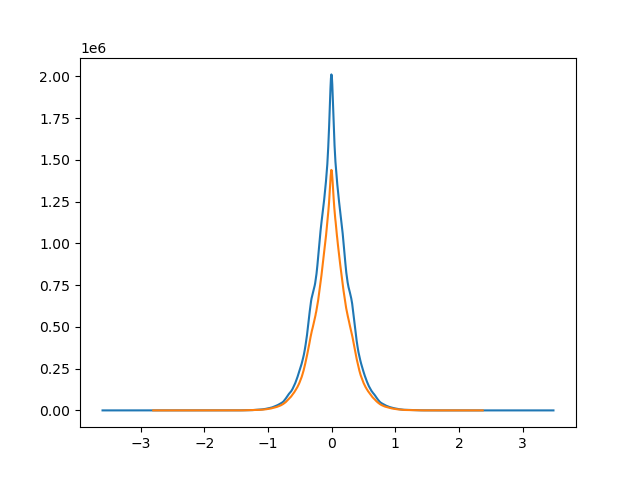

In [6]:
plt.figure()
plt.plot(bordesx04filter[:-1],hx04filter)
plt.plot(bordesy04filter[:-1],hy04filter)


### Distribution function v filtering trayectories

In [23]:
h04filter, bordes04filter=np.histogram(datavelocfilter['v'].values,bins=1000)

(0.0, 0.6)

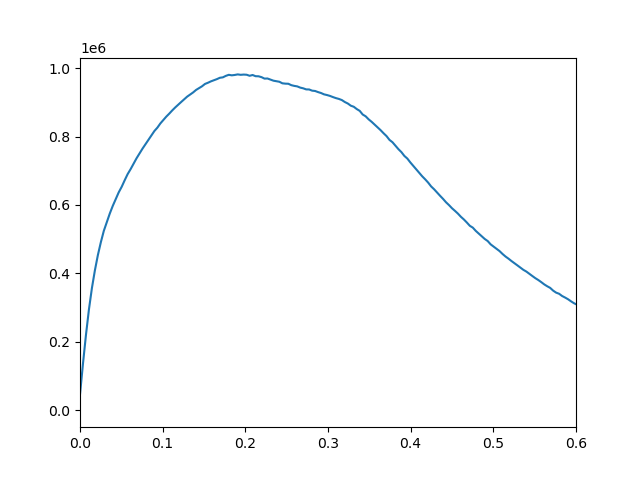

In [24]:
plt.figure()
plt.plot(bordes04filter[:-1],h04filter)
plt.xlim(0,0.6)

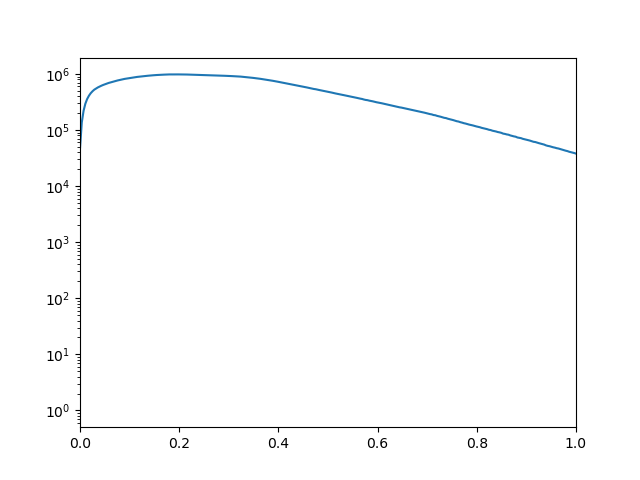

In [25]:
plt.figure()
plt.plot(bordes04filter[:-1],h04filter)
plt.xlim(0,1)
plt.yscale('log')

In [9]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4filter.txt',bordes04filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4filter.txt',h04filter)

In [6]:
hx04, bordesx04= np.histogram(dataveloc['vx'].values,bins=1000)
hy04, bordesy04= np.histogram(dataveloc['vy'].values,bins=1000)

### Distribution function vx, vy without filtering trayectories

(-0.4, 0.4)

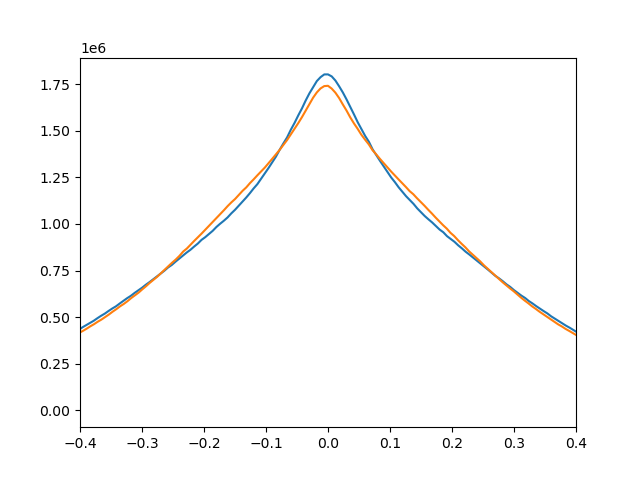

In [7]:
plt.figure()
plt.plot(bordesx04[:-1],hx04)
plt.plot(bordesy04[:-1],hy04)
plt.xlim(-0.4,0.4)


In [8]:
h04, bordes04=np.histogram(dataveloc['v'].values,bins=1000)

### Distribution function v without filtering trayectories

(0.0, 0.6)

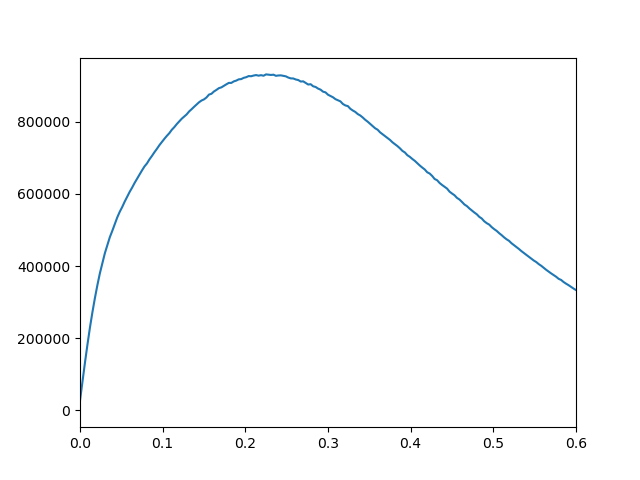

In [9]:
plt.figure()
plt.plot(bordes04[:-1],h04)
plt.xlim(0,0.6)

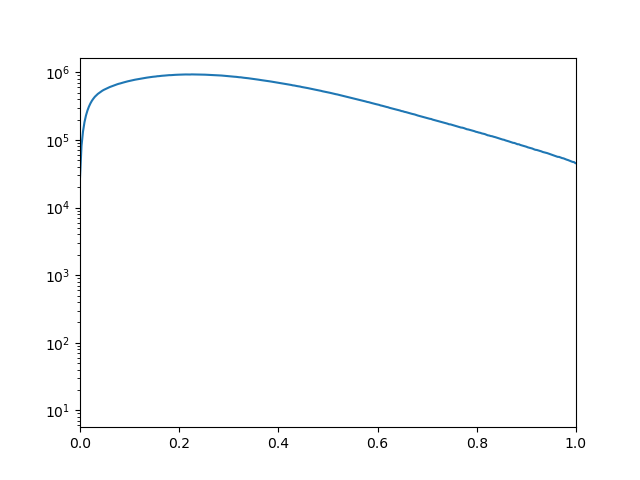

In [10]:
plt.figure()
plt.plot(bordes04[:-1],h04)
plt.xlim(0,1)
plt.yscale('log')

In [11]:
bordes04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4filter.txt')
h04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4filter.txt')

### Distribution function v comparison filtering (blue) and without filtering (red)

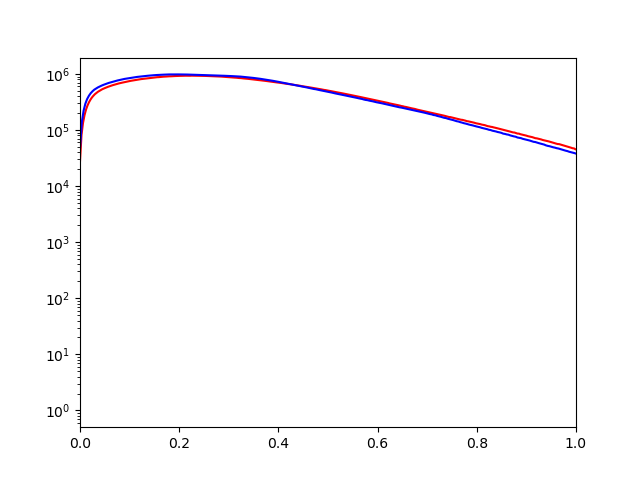

In [26]:
plt.figure()
plt.plot(bordes04[:-1],h04,c='r')
plt.plot(bordes04filter[:-1],h04filter,c='b')
plt.xlim(0,1)
plt.yscale('log')


(0.0, 1.0)

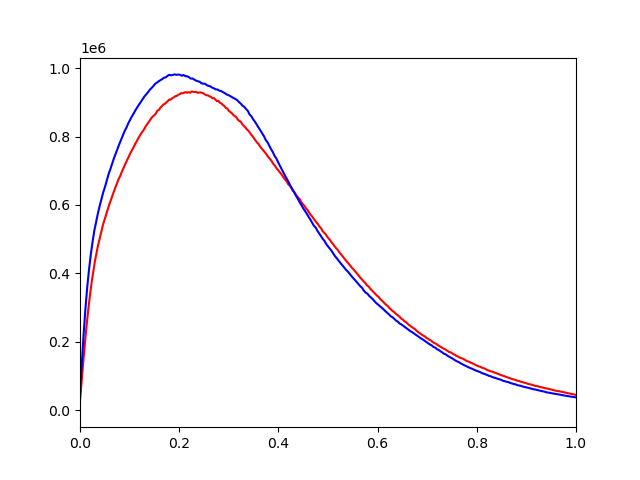

In [27]:
plt.figure()
plt.plot(bordes04[:-1],h04,c='r')
plt.plot(bordes04filter[:-1],h04filter,c='b')
plt.xlim(0,1)
#plt.yscale('log')


In [14]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4.txt',bordes04)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4.txt',h04)

## Plotting all together

In [4]:
bordes04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4filter.txt')
h04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4filter.txt')

In [5]:
bordes03filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.3filter.txt')
h03filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.3filter.txt')

In [6]:
bordes02filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2filter.txt')
h02filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2filter.txt')

In [7]:
bordes01filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1filter.txt')
h01filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1filter.txt')

In [8]:
bordes00625filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625filter.txt')
h00625filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625filter.txt')

In [4]:
bordes04=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4.txt')
h04=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4.txt')

In [15]:
bordes03=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.3.txt')
h03=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.3.txt')

In [16]:
bordes02=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2.txt')
h02=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2.txt')

In [17]:
bordes01=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1.txt')
h01=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1.txt')

In [18]:
bordes00625=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625.txt')
h00625=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625.txt')

## Distribution function for velocities without filtering trayectories

(0.0, 0.7)

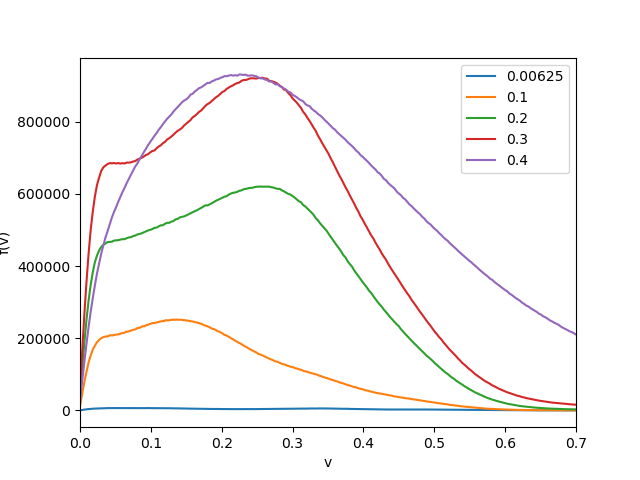

In [20]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes01[:-1],h01)
plt.plot(bordes02[:-1],h02)
plt.plot(bordes03[:-1],h03)
plt.plot(bordes04[:-1],h04)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.3','0.4'],loc='upper right')
plt.xlim(0,0.7)
#plt.yscale('log')

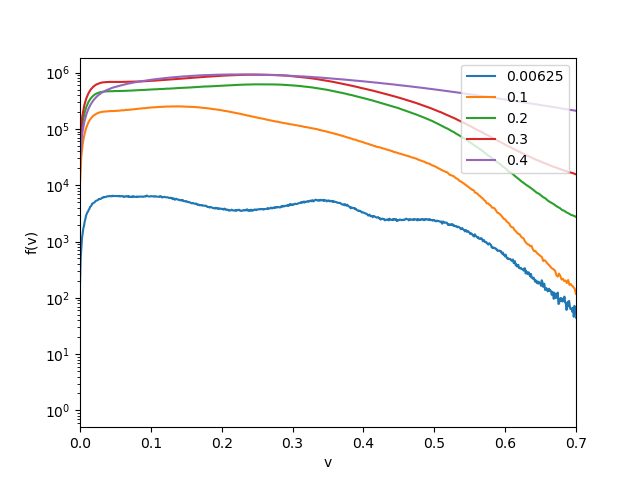

In [21]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes01[:-1],h01)
plt.plot(bordes02[:-1],h02)
plt.plot(bordes03[:-1],h03)
plt.plot(bordes04[:-1],h04)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.3','0.4'],loc='upper right')
plt.xlim(0,0.7)
plt.yscale('log')

## Distribution function for velocities filtering trayectories

(0.0, 1.0)

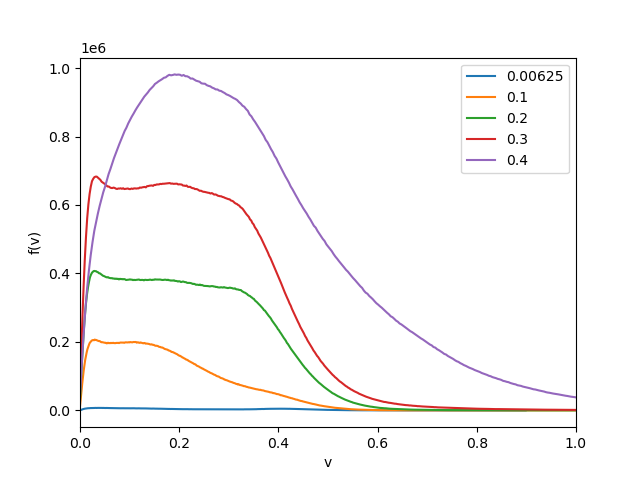

In [30]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)
plt.plot(bordes01filter[:-1],h01filter)
plt.plot(bordes02filter[:-1],h02filter)
plt.plot(bordes03filter[:-1],h03filter)
plt.plot(bordes04filter[:-1],h04filter)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.3','0.4'],loc='upper right')
plt.xlim(0,1)

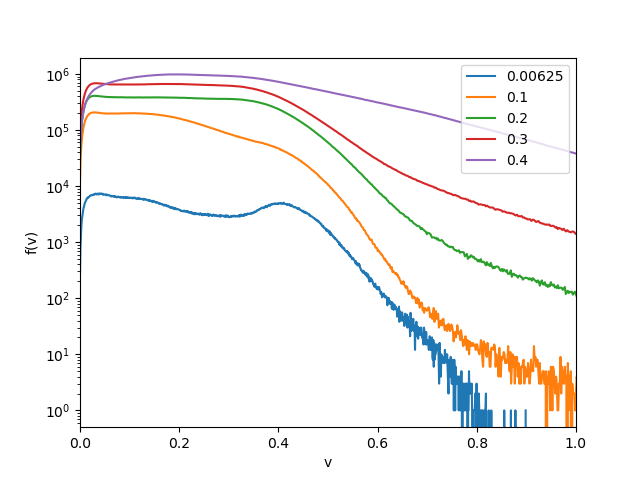

In [31]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)
plt.plot(bordes01filter[:-1],h01filter)
plt.plot(bordes02filter[:-1],h02filter)
plt.plot(bordes03filter[:-1],h03filter)
plt.plot(bordes04filter[:-1],h04filter)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.3','0.4'],loc='upper right')
plt.xlim(0,1)
plt.yscale('log')